# Outlier Treatment

In [32]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
import seaborn as sns

import os
import time
import re

In [3]:
import numpy as np
data=pd.read_csv("news_share_data.csv")

In [4]:
data.shape

(1003, 22)

In [6]:
data.head(10)

,article_id,title,text,published_date,unique_tokens_rate,num_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel,min_avg_key,max_avg_key,avg_avg_key,href_avg_shares,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,title_subjectivity,title_sentiment_polarity,shares
0,7014291,It's Time for a YouTube Competitor,It was reported last week that Yahoo is gettin...,3/31/2014 0:00,0.640816,5,3,1,4.579592,5,Business,1459.500,4817.692,3370.415,1833.333,0.403762,0.038762,0.036735,0.024490,0.250000,0.250000,1600
1,7014327,The Ultimate Roundup of 2014's Biggest April F...,April Fools' marks the day when pranking goes ...,4/1/2014 0:00,0.549618,4,1,0,4.636704,7,Tech,0.000,3581.094,2556.367,8500.000,0.410707,0.180934,0.044944,0.003745,0.000000,0.000000,1500
2,7014304,A Selfie and One Garish Jacket: How the Red So...,The 2013 World Series champion Boston Red Sox ...,4/1/2014 0:00,0.577236,8,1,0,4.627451,7,Tech,2270.889,3852.800,3018.167,2076.333,0.397545,0.044864,0.035294,0.019608,0.000000,0.000000,1400
3,7031995,African Telecom Proposes More Diverse Emoticons,Less than a week after Apple pledged to make i...,4/1/2014 0:00,0.525896,4,1,0,5.083665,9,Tech,0.000,3581.094,1871.403,2200.000,0.491578,0.157620,0.047809,0.011952,0.000000,0.000000,1300
4,6541359,"Google to Launch Improved Android Camera App, ...",Android users may soon see a series of new fea...,4/1/2014 0:00,0.588889,6,9,0,4.336022,7,00000,3581.094,8453.451,5155.323,805.000,0.628535,0.078497,0.053763,0.034946,0.000000,0.000000,3000
5,7033985,Apple to Begin iPhone 6 Screen Production in M...,Whispers surrounding a possible iPhone 6 relea...,4/1/2014 0:00,0.494269,8,1,0,4.360679,4,Business,3343.790,4817.692,3974.216,31625.000,0.567866,0.098980,0.038190,0.024045,0.666667,-0.333330,1600
6,7014312,"Apple Updates iWork for OS X, iOS and iCloud","Apple updated its iWork suite Tuesday, adding ...",4/1/2014 0:00,0.639706,4,1,0,4.594444,7,Lifestyle,2499.333,5549.418,3667.217,4800.000,0.347222,0.186111,0.033333,0.005556,0.000000,0.000000,1300
7,3299703,Spare Your Facebook Friends From These 9 April...,Everybody's a comedian -- at least they think ...,4/1/2014 0:00,0.508511,26,8,0,4.713427,7,Tech,3030.861,4622.544,3761.262,3700.000,0.484539,0.134520,0.050100,0.026052,0.400000,-0.150000,2000
8,7014271,Why Tech Takes April Fools' Day So Seriously,Tech journalists hate April Fools' Day. Not be...,4/1/2014 0:00,0.481013,9,3,1,4.374613,8,Lifestyle,0.000,6813.466,3745.055,11800.000,0.533060,0.186324,0.046440,0.021672,0.066667,0.033333,2100
9,7008095,Atlanta Is World's Busiest Airport With 94 Mil...,Atlanta's Hartsfield-Jackson airport remained ...,4/1/2014 0:00,0.422028,11,1,0,4.272043,5,Business,3343.790,5585.617,4111.006,2600.000,0.502861,0.121931,0.043011,0.018280,0.357143,0.000000,1100


In [7]:
data.tail(10)

,article_id,title,text,published_date,unique_tokens_rate,num_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel,min_avg_key,max_avg_key,avg_avg_key,href_avg_shares,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,title_subjectivity,title_sentiment_polarity,shares
993,7003169,"Ironically, Anonymous App Secret Is Hatching I...","On anonymous social media app Secret, you can ...",4/17/2014 0:00,0.477778,4,0,2,4.691646,5,Tech,3016.262,18851.050,6554.751,210300.0,0.432624,0.161028,0.035627,0.009828,0.562500,0.250000,2600
994,7022961,Snowden Asks Putin on Live TV If He Spies on R...,In what could be best described as a bizarre P...,4/17/2014 0:00,0.685841,4,0,2,4.391304,7,Entertainment,0.000,4123.765,2033.248,14750.0,0.335245,0.000216,0.021739,0.013043,0.000000,0.000000,851
995,7022974,You Can Now Invest in Your Neighbors' Solar En...,Here's another reason to be nice to the neighb...,4/17/2014 0:00,0.532637,6,12,0,4.380102,9,Tech,0.000,3764.693,1898.138,1100.0,0.477043,0.262305,0.058673,0.010204,0.000000,0.000000,3100
996,7003123,Captain of Sunken South Korea Ferry: 'I'm Sorry',"Lee Joon Suk, captain of the South Korean ferr...",4/17/2014 0:00,0.000000,0,21,0,0.000000,10,00000,0.000,8345.793,4746.031,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5800
997,7022926,30 'Star Wars' Facts You Didn't Know,"Learn something, you will.\n\nIn celebration o...",4/17/2014 0:00,0.468652,17,3,0,5.026398,7,00000,1579.216,3610.125,2617.292,7587.5,0.459514,0.062166,0.023292,0.010870,0.200000,0.200000,2500
998,7022921,How to Make a Caesar Salad and 8 Other Super S...,Let's cut to the chase. While some apps have a...,4/17/2014 0:00,0.606557,6,2,0,4.913978,4,Business,3329.921,5709.823,4020.608,1950.0,0.493519,-0.119440,0.005376,0.021505,0.000000,0.000000,1300
999,7002829,Taylor Swift Surprised a Fan at Her Bridal Shower,Taylor Swift and bridal showers were made for ...,4/17/2014 0:00,0.491018,4,2,0,4.674627,6,Tech,0.000,4352.491,2358.572,4200.0,0.455042,0.191196,0.053731,0.011940,0.000000,0.000000,1100
1000,7003024,'The Amazing Spider-Man 2' Hosts First Google ...,We've seen big movies throw big Google Hangout...,4/17/2014 0:00,0.634518,3,0,2,4.177665,9,Entertainment,2126.118,6060.771,3296.052,3400.0,0.522917,0.009809,0.025381,0.045685,0.600000,-0.600000,4400
1001,7002995,How 2 Animators Independently Recreated Pixar ...,Pixar art directors Robert Kondo and Dice Tsut...,4/17/2014 0:00,0.447368,7,1,0,4.667961,8,Business,0.000,4763.083,2709.129,0.0,0.494445,0.144969,0.069903,0.020388,0.833333,0.433333,1900
1002,7003062,Not in 'Twilight' Anymore: Robert Pattinson Ba...,Held at gunpoint after his brother abandoned h...,4/17/2014 0:00,0.480412,5,2,0,4.429126,5,Business,1404.841,3610.125,2717.930,1100.0,0.296896,0.082484,0.029126,0.023301,0.333333,0.250000,949


In [8]:
data.describe()

,article_id,unique_tokens_rate,num_hrefs,num_imgs,num_videos,average_token_length,num_keywords,min_avg_key,max_avg_key,avg_avg_key,href_avg_shares,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,title_subjectivity,title_sentiment_polarity,shares
count,1.003000e+03,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000
mean,6.915159e+06,0.526890,11.720837,5.188435,1.215354,4.603757,7.206381,1131.437972,6463.258234,3359.478830,13518.302031,0.446724,0.106187,0.038169,0.017772,0.292537,0.057536,4247.304088
std,4.823885e+05,0.118793,15.181597,8.495002,4.079730,0.701756,1.856713,1181.134621,7455.421154,1467.674637,51499.106509,0.109167,0.092496,0.015673,0.010557,0.325227,0.266609,22609.634435
min,2.195051e+06,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,3568.870000,1360.101000,0.000000,0.000000,-0.300000,0.000000,0.000000,0.000000,-1.000000,58.000000
25%,7.006102e+06,0.466751,4.000000,1.000000,0.000000,4.490363,6.000000,0.000000,3613.040000,2533.297000,1300.000000,0.395575,0.051911,0.028655,0.011224,0.000000,0.000000,1000.000000
50%,7.013065e+06,0.533118,8.000000,2.000000,0.000000,4.685484,7.000000,984.066700,4635.807000,3004.755000,2766.667000,0.455990,0.102579,0.037325,0.016266,0.200000,0.000000,1600.000000
75%,7.027570e+06,0.596615,14.000000,7.000000,1.000000,4.855388,9.000000,2116.714500,6561.910000,3809.005000,7341.000000,0.509508,0.163183,0.046922,0.022597,0.500000,0.150000,3100.000000
max,7.041291e+06,0.867925,162.000000,84.000000,51.000000,7.218430,10.000000,3613.040000,102200.000000,17604.270000,663600.000000,0.875000,0.489623,0.120805,0.103030,1.000000,1.000000,663600.000000


In [9]:
df = data.copy()

# Feature Engineering

Average shares by data channel

,data_channel,shares
5,Tech,6682.075758
0,00000,4198.960000
4,Social Media,4137.018182
2,Entertainment,3389.443243
1,Business,2912.268293
3,Lifestyle,2650.274510


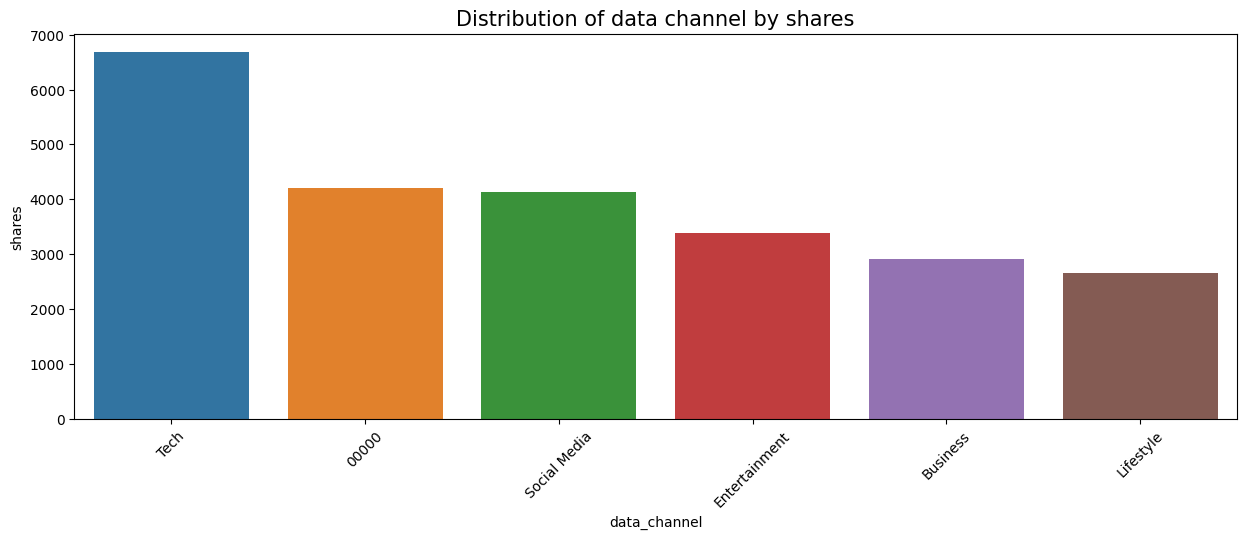

In [12]:
temp = (df.groupby('data_channel')['shares'].mean()
            .reset_index().sort_values(by='shares',ascending=False)[:10])
display(temp)

plt.figure(figsize=(15,5))
sns.barplot(x=temp['data_channel'],y=temp['shares'])
plt.title("Distribution of data channel by shares",size=15)
plt.xticks(rotation=45)
plt.show()

In [14]:
import os

# Ensure the 'model' directory exists
directory = 'model'
if not os.path.exists(directory):
    os.makedirs(directory)

# Saving the mapping dict for inference use
sub_area_price_map = df.groupby('data_channel')['shares'].mean().to_dict()

import pickle
fileName = 'model/data_channel_shares.pkl'
with open(fileName, 'wb') as f:
    pickle.dump(sub_area_price_map, f)

sub_area_price_map


{'00000': 4198.96,
 'Business': 2912.268292682927,
 'Entertainment': 3389.443243243243,
 'Lifestyle': 2650.274509803922,
 'Social Media': 4137.018181818182,
 'Tech': 6682.075757575758}

In [15]:
df.groupby('data_channel')['shares'].transform('mean')

0       2912.268293
1       6682.075758
2       6682.075758
3       6682.075758
4       4198.960000
5       2912.268293
6       2650.274510
7       6682.075758
8       2650.274510
9       2912.268293
10      2912.268293
11      2912.268293
12      3389.443243
13      6682.075758
14      2912.268293
15      4198.960000
16      2912.268293
17      4137.018182
18      6682.075758
19      6682.075758
20      3389.443243
21      2912.268293
22      4198.960000
23      6682.075758
24      6682.075758
25      6682.075758
26      3389.443243
27      2912.268293
28      3389.443243
29      4198.960000
30      3389.443243
31      4137.018182
32      2912.268293
33      6682.075758
34      2650.274510
35      2912.268293
36      4198.960000
37      4198.960000
38      4198.960000
39      4198.960000
40      2912.268293
41      6682.075758
42      3389.443243
43      3389.443243
44      6682.075758
45      3389.443243
46      4198.960000
47      6682.075758
48      4198.960000
49      4198.960000


In [16]:
# creating the price by sub-area feature
df['data_channel'] =  df.groupby('data_channel')['shares'].transform('mean')
df.head(3)

,article_id,title,text,published_date,unique_tokens_rate,num_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel,min_avg_key,max_avg_key,avg_avg_key,href_avg_shares,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,title_subjectivity,title_sentiment_polarity,shares,article_length,published_day
0,7014291,It's Time for a YouTube Competitor,It was reported last week that Yahoo is gettin...,3/31/2014 0:00,0.959501,-0.442917,-0.257743,-0.052813,-0.034452,5,2912.268293,1459.500,4817.692,3370.415,1833.333,0.403762,0.038762,0.036735,0.024490,0.25,0.25,1600,-0.626876,Monday
1,7014327,The Ultimate Roundup of 2014's Biggest April F...,April Fools' marks the day when pranking goes ...,4/1/2014 0:00,0.191416,-0.508819,-0.493293,-0.298049,0.046973,7,6682.075758,0.000,3581.094,2556.367,8500.000,0.410707,0.180934,0.044944,0.003745,0.00,0.00,1500,-0.835055,Tuesday
2,7014304,A Selfie and One Garish Jacket: How the Red So...,The 2013 World Series champion Boston Red Sox ...,4/1/2014 0:00,0.424019,-0.245211,-0.493293,-0.298049,0.033781,7,6682.075758,2270.889,3852.800,3018.167,2076.333,0.397545,0.044864,0.035294,0.019608,0.00,0.00,1400,-0.058972,Tuesday


In [17]:
# checking the correlation of the feature
df[['data_channel','shares']].corr()

,data_channel,shares
data_channel,1.000000,0.058179
shares,0.058179,1.000000


## Ameneties Scorr

In [19]:
amenities_col = df.columns.tolist()
amenities_col

['article_id',
 'title',
 'text',
 'published_date',
 'unique_tokens_rate',
 'num_hrefs',
 'num_imgs',
 'num_videos',
 'average_token_length',
 'num_keywords',
 'data_channel',
 'min_avg_key',
 'max_avg_key',
 'avg_avg_key',
 'href_avg_shares',
 'global_subjectivity',
 'global_sentiment_polarity',
 'global_rate_positive_words',
 'global_rate_negative_words',
 'title_subjectivity',
 'title_sentiment_polarity',
 'shares',
 'article_length',
 'published_day']

In [20]:
temp = df[amenities_col]
temp['Amenities score'] = temp.sum(axis=1)
temp['shares'] = df['data_channel']
temp.head(3)

<ipython-input-20-0683db411832>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  temp['Amenities score'] = temp.sum(axis=1)


,article_id,title,text,published_date,unique_tokens_rate,num_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel,min_avg_key,max_avg_key,avg_avg_key,href_avg_shares,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,title_subjectivity,title_sentiment_polarity,shares,article_length,published_day,Amenities score
0,7014291,It's Time for a YouTube Competitor,It was reported last week that Yahoo is gettin...,3/31/2014 0:00,0.959501,-0.442917,-0.257743,-0.052813,-0.034452,5,2912.268293,1459.500,4817.692,3370.415,1833.333,0.403762,0.038762,0.036735,0.024490,0.25,0.25,2912.268293,-0.626876,Monday,7.030290e+06
1,7014327,The Ultimate Roundup of 2014's Biggest April F...,April Fools' marks the day when pranking goes ...,4/1/2014 0:00,0.191416,-0.508819,-0.493293,-0.298049,0.046973,7,6682.075758,0.000,3581.094,2556.367,8500.000,0.410707,0.180934,0.044944,0.003745,0.00,0.00,6682.075758,-0.835055,Tuesday,7.037152e+06
2,7014304,A Selfie and One Garish Jacket: How the Red So...,The 2013 World Series champion Boston Red Sox ...,4/1/2014 0:00,0.424019,-0.245211,-0.493293,-0.298049,0.033781,7,6682.075758,2270.889,3852.800,3018.167,2076.333,0.397545,0.044864,0.035294,0.019608,0.00,0.00,6682.075758,-0.058972,Tuesday,7.033611e+06


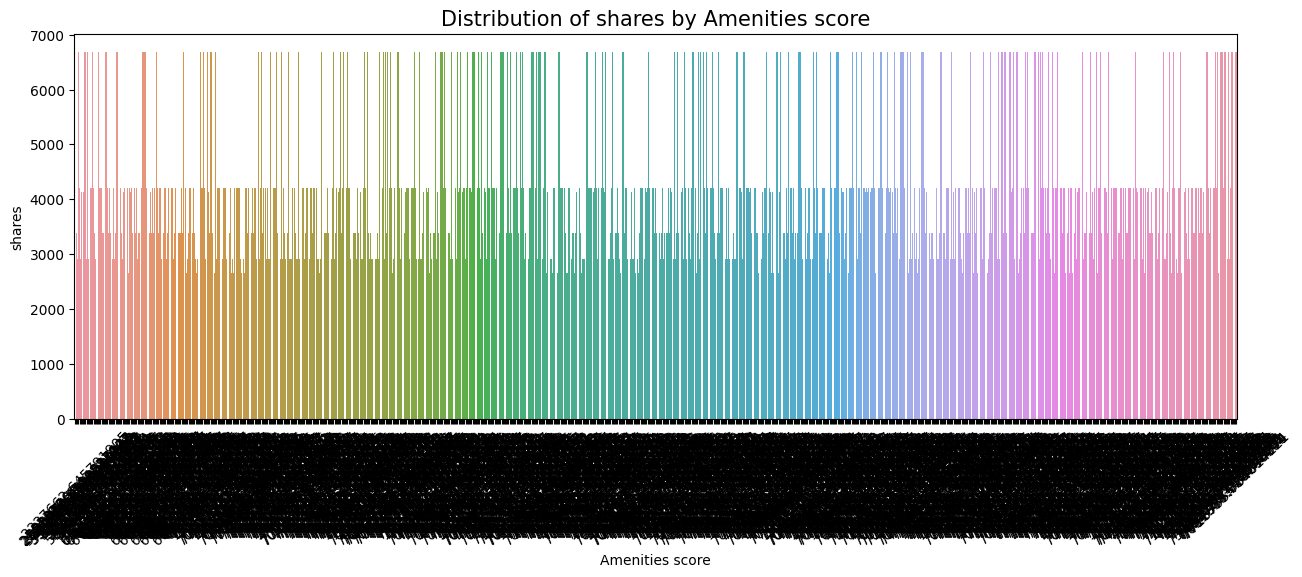

In [21]:
temp2 = (temp.groupby('Amenities score')['shares'].mean()
            .reset_index().sort_values(by='shares',ascending=False)[:10])

plt.figure(figsize=(15,5))
sns.barplot(x=temp['Amenities score'],y=temp['shares'])
plt.title("Distribution of shares by Amenities score",size=15)
plt.xticks(rotation=45)
plt.show()

In [22]:
# Adding the amenitites score feature
df['Amenities score'] = temp['Amenities score']
print(df.shape)
df.head(3)

(1003, 25)


,article_id,title,text,published_date,unique_tokens_rate,num_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel,min_avg_key,max_avg_key,avg_avg_key,href_avg_shares,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,title_subjectivity,title_sentiment_polarity,shares,article_length,published_day,Amenities score
0,7014291,It's Time for a YouTube Competitor,It was reported last week that Yahoo is gettin...,3/31/2014 0:00,0.959501,-0.442917,-0.257743,-0.052813,-0.034452,5,2912.268293,1459.500,4817.692,3370.415,1833.333,0.403762,0.038762,0.036735,0.024490,0.25,0.25,1600,-0.626876,Monday,7.030290e+06
1,7014327,The Ultimate Roundup of 2014's Biggest April F...,April Fools' marks the day when pranking goes ...,4/1/2014 0:00,0.191416,-0.508819,-0.493293,-0.298049,0.046973,7,6682.075758,0.000,3581.094,2556.367,8500.000,0.410707,0.180934,0.044944,0.003745,0.00,0.00,1500,-0.835055,Tuesday,7.037152e+06
2,7014304,A Selfie and One Garish Jacket: How the Red So...,The 2013 World Series champion Boston Red Sox ...,4/1/2014 0:00,0.424019,-0.245211,-0.493293,-0.298049,0.033781,7,6682.075758,2270.889,3852.800,3018.167,2076.333,0.397545,0.044864,0.035294,0.019608,0.00,0.00,1400,-0.058972,Tuesday,7.033611e+06


## Average price by Amenities score:

In [23]:
# Saving the mapping dict for inference use
amenities_score_price_map = df.groupby('Amenities score')['shares'].mean().to_dict()

import pickle
fileName = 'model/amenities_score_price_map.pkl'
with open(fileName,'wb') as f:
    pickle.dump(amenities_score_price_map,f)

amenities_score_price_map

{2227662.645791905: 911.0,
 2553673.2408257998: 1400.0,
 2686954.9553340245: 2600.0,
 2830000.9066238143: 2700.0,
 2959699.519517377: 2000.0,
 3124758.8562369607: 827.0,
 3131662.04837647: 1600.0,
 3148103.296927982: 1900.0,
 3323507.889126558: 2000.0,
 3405353.9413750395: 1100.0,
 3541745.4741356657: 1900.0,
 4528140.873662172: 3400.0,
 5060134.260382028: 1300.0,
 5068329.508234462: 702.0,
 5224293.033172317: 1200.0,
 5279936.929811931: 2400.0,
 5367025.673412412: 992.0,
 5405681.94527851: 497.0,
 5465946.68714946: 1400.0,
 5476527.710273339: 1000.0,
 5570339.175386174: 2700.0,
 5697131.966226264: 7500.0,
 5741996.610242379: 2000.0,
 5743368.054696961: 971.0,
 5825785.3035256555: 902.0,
 5832011.790268118: 1100.0,
 5833488.909910504: 1400.0,
 5852665.009042496: 4500.0,
 5855285.725998276: 829.0,
 5867088.592551892: 4100.0,
 5871735.740203891: 3800.0,
 5968256.204383132: 781.0,
 6016387.50234966: 16500.0,
 6190564.704979323: 82000.0,
 6245387.751739002: 733.0,
 6253987.017601591: 1700.

In [24]:
# creating the price by amenities score feature
df['shares by Amenities score'] =  df.groupby('Amenities score')['shares'].transform('mean')
print(df.shape)
df.head(3)

(1003, 26)


,article_id,title,text,published_date,unique_tokens_rate,num_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel,min_avg_key,max_avg_key,avg_avg_key,href_avg_shares,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,title_subjectivity,title_sentiment_polarity,shares,article_length,published_day,Amenities score,shares by Amenities score
0,7014291,It's Time for a YouTube Competitor,It was reported last week that Yahoo is gettin...,3/31/2014 0:00,0.959501,-0.442917,-0.257743,-0.052813,-0.034452,5,2912.268293,1459.500,4817.692,3370.415,1833.333,0.403762,0.038762,0.036735,0.024490,0.25,0.25,1600,-0.626876,Monday,7.030290e+06,1600.0
1,7014327,The Ultimate Roundup of 2014's Biggest April F...,April Fools' marks the day when pranking goes ...,4/1/2014 0:00,0.191416,-0.508819,-0.493293,-0.298049,0.046973,7,6682.075758,0.000,3581.094,2556.367,8500.000,0.410707,0.180934,0.044944,0.003745,0.00,0.00,1500,-0.835055,Tuesday,7.037152e+06,1500.0
2,7014304,A Selfie and One Garish Jacket: How the Red So...,The 2013 World Series champion Boston Red Sox ...,4/1/2014 0:00,0.424019,-0.245211,-0.493293,-0.298049,0.033781,7,6682.075758,2270.889,3852.800,3018.167,2076.333,0.397545,0.044864,0.035294,0.019608,0.00,0.00,1400,-0.058972,Tuesday,7.033611e+06,1400.0


# Feature Extraction





## Wordcloud of the Description:

In [25]:
import re
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [27]:
import nltk

# Download the stopwords resource
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [29]:
# Preprocessing the text data

REPLACE_BY_SPACE_RE = re.compile("[/(){}\[\]\|@,;!\.]")
BAD_SYMBOLS_RE = re.compile("[^0-9a-z #+_]")
STOPWORDS_nlp = set(stopwords.words('english'))

# Custom Stoplist
stoplist = ["i","project","living","home",'apartment',"pune","me","my","myself","we","our","ours","ourselves","you","you're","you've","you'll","you'd","your",
            "yours","yourself","yourselves","he","him","his","himself","she","she's","her","hers","herself","it",
            "it's","its","itself","they","them","their","theirs","themselves","what","which","who","whom","this","that","that'll",
            "these","those","am","is","are","was","were","be","been","being","have","has","had","having","do","does","did",
            "doing","a","an","the","and","but","if","or","because","as","until","while","of","at","by","for","with","about",
            "against","between","into","through","during","before","after","above","below","to","from","up","down","in","out",
            "on","off","over","under","again","further","then","once","here","there","when","where","why","all","any",
            "both","each","few","more","most","other","some","such","no","nor","not","only","own","same","so","than","too",
            "very","s","t","can","will","just","don","don't","should","should've","now","d","ll","m","o","re","ve","y","ain",
            "aren","couldn","didn","doesn","hadn","hasn",
            "haven","isn","ma","mightn","mustn","needn","shan","shan't",
            "shouldn","wasn","weren","won","rt","rt","qt","for",
            "the","with","in","of","and","its","it","this","i","have","has","would","could","you","a","an",
            "be","am","can","edushopper","will","to","on","is","by","ive","im","your","we","are","at","as","any","ebay","thank","hello","know",
            "need","want","look","hi","sorry","http", "https","body","dear","hello","hi","thanks","sir","tomorrow","sent","send","see","there","welcome","what","well","us"]

STOPWORDS_nlp.update(stoplist)

# Function to preprocess the text
def text_prepare(text):
    """
        text: a string

        return: modified initial string
    """
    text = text.replace("\d+"," ")  # removing digits
    text = re.sub(r"(?:\@|https?\://)\S+", "", text)  # removing mentions and urls
    text = text.lower()  # lowercase text
    text = re.sub('[0-9]+', '', text)
    text = REPLACE_BY_SPACE_RE.sub(" ", text)  # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub(" ", text)  # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join([word for word in text.split() if word not in STOPWORDS_nlp])  # delete stopwors from text
    text = text.strip()
    return text

# Cleaning the "text" column in the data frame using the above defined function
df_text = df["text"].astype(str).apply(text_prepare)
df_text.head()


0    reported last week yahoo getting online video ...
1    april fools marks day pranking goes corporate ...
2    world series champion boston red sox visited w...
3    less week apple pledged make emoticons raciall...
4    android users may soon series new features dev...
Name: text, dtype: object

In [30]:
text = " ".join(sent for sent in df_text)
print("There are {} words in the text.".format(len(text)))

There are 1772416 words in the text.


In [31]:
text[:1000]

'reported last week yahoo getting online video business courting youtube stars networks move mark one biggest challenges youtube audience dominance create serious competition online video world seealso slug second youtube videos september internet traffic going youtube site traffic another streaming video behemoth netflix many internet users looking video content many video creators left unhappy due changing content id rules low monetization rates makes sense competitors start rise check video learn yahoo video service plans host lamarr wilson also covers disney acquisition maker studio reveals picks video channel week also sure subscribe mashable youtube never miss episode last week youtube weekly youtube kids april fools marks day pranking goes corporate former president along major companies like netflix lego american eagle got foolish action today compiled every joke gag scam found online tuesday caused chuckle two confusing holiday keep updating lies unearthed trust one especially

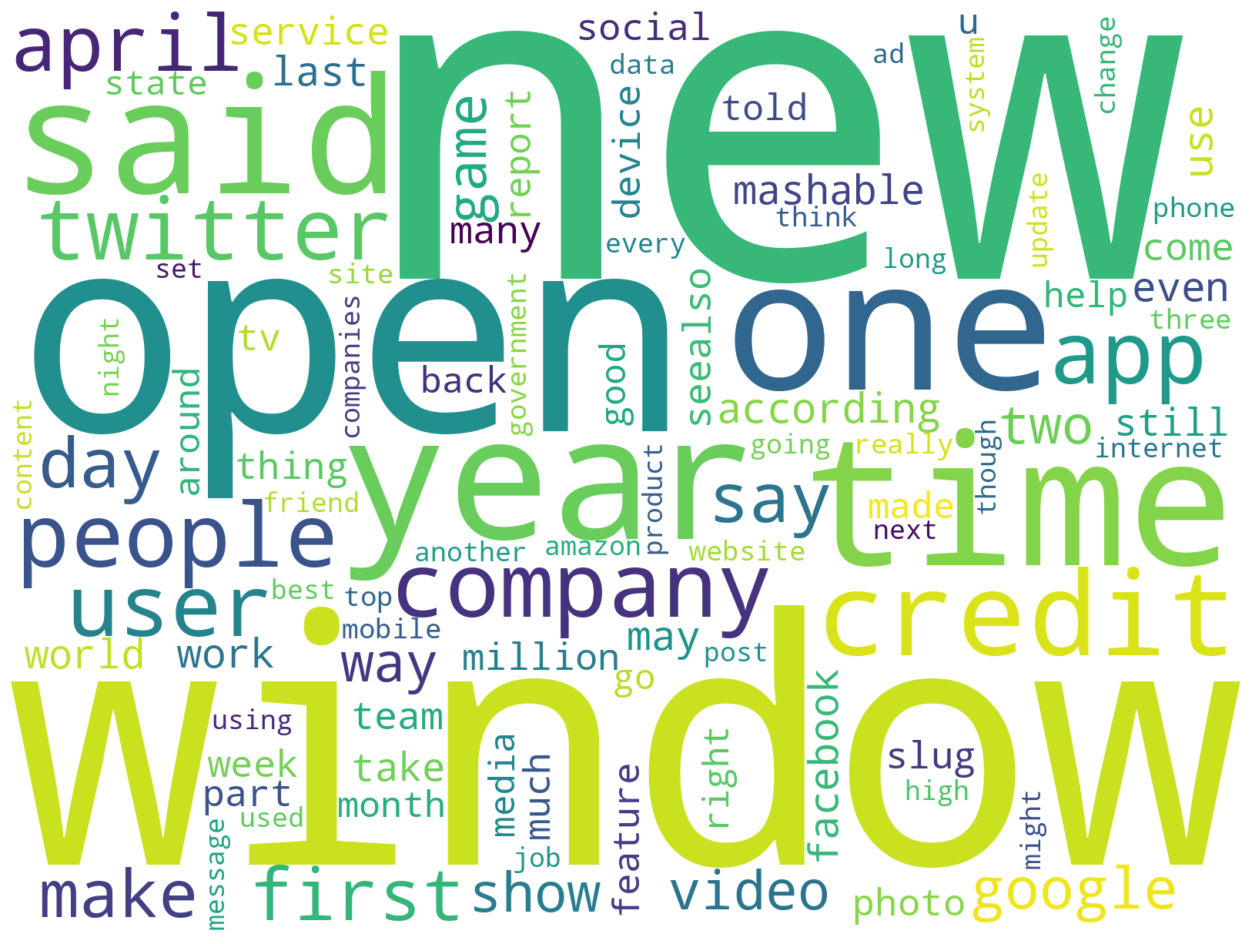

In [33]:
wordcloud = WordCloud(background_color = "white", height=1200, width= 1600, collocations=False , max_words= 100).generate(text)
plt.figure(figsize= (16,12))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

## POS feature

In [34]:
# cleaning the description column
df["text"] =  df["text"].astype(str).apply(text_prepare)

In [35]:
df['text'][:2]

0    reported last week yahoo getting online video ...
1    april fools marks day pranking goes corporate ...
Name: text, dtype: object

In [37]:
import nltk

nltk.download('averaged_perceptron_tagger')

from collections import Counter

def pos_counter(x,pos):
    """
    Returns the count for the given parts of speech tag

    NN - Noun
    VB - Verb
    JJ - Adjective
    RB - Adverb
    """
    tokens = nltk.word_tokenize(x.lower())
    tokens = [word for word in tokens if word not in STOPWORDS_nlp]
    text = nltk.Text(tokens)
    tags = nltk.pos_tag(text)
    counts = Counter(tag for word,tag in tags)
    return counts[pos]

df['Noun_Counts'] = df['text'].apply(lambda x: pos_counter(x,'NN'))
df['Verb_Counts'] = df['text'].apply(lambda x: (pos_counter(x,'VB')+pos_counter(x,'RB')))
df['Adjective_Counts'] = df['text'].apply(lambda x: pos_counter(x,'JJ'))

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [38]:
print(df.shape)
df.head()

(1003, 29)


,article_id,title,text,published_date,unique_tokens_rate,num_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel,min_avg_key,max_avg_key,avg_avg_key,href_avg_shares,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,title_subjectivity,title_sentiment_polarity,shares,article_length,published_day,Amenities score,shares by Amenities score,Noun_Counts,Verb_Counts,Adjective_Counts
0,7014291,It's Time for a YouTube Competitor,reported last week yahoo getting online video ...,3/31/2014 0:00,0.959501,-0.442917,-0.257743,-0.052813,-0.034452,5,2912.268293,1459.500,4817.692,3370.415,1833.333,0.403762,0.038762,0.036735,0.024490,0.25,0.25,1600,-0.626876,Monday,7.030290e+06,1600.0,38,8,19
1,7014327,The Ultimate Roundup of 2014's Biggest April F...,april fools marks day pranking goes corporate ...,4/1/2014 0:00,0.191416,-0.508819,-0.493293,-0.298049,0.046973,7,6682.075758,0.000,3581.094,2556.367,8500.000,0.410707,0.180934,0.044944,0.003745,0.00,0.00,1500,-0.835055,Tuesday,7.037152e+06,1500.0,16,4,12
2,7014304,A Selfie and One Garish Jacket: How the Red So...,world series champion boston red sox visited w...,4/1/2014 0:00,0.424019,-0.245211,-0.493293,-0.298049,0.033781,7,6682.075758,2270.889,3852.800,3018.167,2076.333,0.397545,0.044864,0.035294,0.019608,0.00,0.00,1400,-0.058972,Tuesday,7.033611e+06,1400.0,97,16,55
3,7031995,African Telecom Proposes More Diverse Emoticons,less week apple pledged make emoticons raciall...,4/1/2014 0:00,-0.008375,-0.508819,-0.493293,-0.298049,0.684209,9,6682.075758,0.000,3581.094,1871.403,2200.000,0.491578,0.157620,0.047809,0.011952,0.00,0.00,1300,-0.484314,Tuesday,7.047638e+06,1300.0,52,13,26
4,6541359,"Google to Launch Improved Android Camera App, ...",android users may soon series new features dev...,4/1/2014 0:00,0.522163,-0.377015,0.448907,-0.298049,-0.381712,7,4198.960000,3581.094,8453.451,5155.323,805.000,0.628535,0.078497,0.053763,0.034946,0.00,0.00,3000,-0.446818,Tuesday,6.566560e+06,3000.0,43,10,33


## Ngram features:

## Bag of Words Representation:

In [39]:
from sklearn.feature_extraction.text import CountVectorizer

In [40]:
cv = CountVectorizer(ngram_range=(2,2),max_features=10)
# cv = CountVectorizer()
cv_object = cv.fit(df['text'])

In [41]:
import pickle
fileName = 'model/count_vectorizer.pkl'
with open(fileName,'wb') as f:
    pickle.dump(cv_object,f)

In [42]:
X = cv_object.transform(df['text'])
print(X.shape)
X.toarray()

(1003, 10)


array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [5, 0, 0, ..., 0, 0, 5],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]])

In [46]:
# Adding this to the main dataframe
df_final = pd.concat([df.reset_index(drop=True)],axis=1)
df_final.shape

(1003, 29)

In [47]:
df_final.sample(5)

,article_id,title,text,published_date,unique_tokens_rate,num_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel,min_avg_key,max_avg_key,avg_avg_key,href_avg_shares,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,title_subjectivity,title_sentiment_polarity,shares,article_length,published_day,Amenities score,shares by Amenities score,Noun_Counts,Verb_Counts,Adjective_Counts
972,5834112,5 Innovations That Will Transform India in the...,mumbai india following united states china ind...,4/17/2014 0:00,-0.720107,-0.706526,2.333307,-0.298049,0.180573,6,6682.075758,0.000,3610.125,2651.034,1100.0,0.455120,0.035942,0.030544,0.022576,0.551515,0.045455,4500,1.843934,Thursday,5.852665e+06,4500.0,217,47,162
687,7025832,3D-Film Pioneer James Cameron Talks VR Filmmak...,director highest grossing movie time opens new...,4/12/2014 0:00,0.103547,-0.508819,-0.375518,-0.298049,-0.544905,8,4198.960000,0.000,4772.885,2301.988,1200.0,0.480364,0.232895,0.023952,0.005988,0.312500,0.000000,3500,0.140224,Saturday,7.041813e+06,3500.0,107,20,51
787,7005558,Report: Samsung Galaxy S5 Sales Double S4's La...,samsung galaxy smartphone launched friday alre...,4/14/2014 0:00,1.146195,-0.574721,-0.493293,-0.298049,-0.112869,4,2912.268293,1426.134,3602.060,2933.366,1100.0,0.311420,0.025386,0.032787,0.032787,0.000000,0.000000,739,-0.500718,Monday,7.018274e+06,739.0,50,7,24
629,7026439,"When Trying to Help the Poor, One Word Can Mak...",social experiment uk shows counterintuitive ap...,4/10/2014 0:00,1.009807,0.216104,0.448907,-0.298049,0.237817,10,4198.960000,0.000,8421.329,4019.202,13100.0,0.497685,0.230370,0.069264,0.008658,0.200000,0.200000,1400,-0.659294,Thursday,7.057591e+06,1400.0,38,5,15
183,7032201,Fort Hood Shooter Bought Gun at Same Store as ...,smith wesson semiautomatic pistol used special...,4/3/2014 0:00,0.281247,2.324970,1.744432,-0.052813,0.203305,6,4198.960000,0.000,7443.405,5052.036,5900.0,0.543750,-0.160420,0.008746,0.032070,0.000000,0.000000,3800,0.230448,Thursday,7.058607e+06,3800.0,109,8,63


# Saving the final model ready data:

In [48]:

df_final.to_csv('model_ready_data.csv', index=False)
